In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
import sys
path_to_module = 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
import os
os.environ["OMP_NUM_THREADS"] = '1'

### ***NEEDED LIBRARIES***

In [2]:
# SET DEVICE
import torch
############
# LOAD DATASET
from New_Code_Files.Datasets_Functions import createHashMap, getHashMap, appendInHashMap, deleteFromHashMap, updateHashMap, functionGetDataset, makeHashMapWithListsToHashmapWithDicts
############
# VISUALIZATION
import matplotlib.colors as mcolors
import numpy as np
from New_Code_Files.Visualization import Visualization
############
# CREATE MLP
from New_Code_Files.MLP import MLP, createMLP
############

### ***SET DEVICE***

In [3]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### ***LOAD DATASET***

In [4]:
hashMapFilePath = path_to_module+"/New_Code_Files/"
#updateHashMap("R15",{'batch_size': 50, 'n_clusters': 15, 'module_name': 'datasets.datasets_New', 'function_name': 'load_R15_dataloader', 'option_name': ''},hashMapFilePath)
hashMap = getHashMap(hashMapFilePath)
print(hashMap.keys())
datasetName = "R3"
datasetProperties = hashMap[datasetName]
print(datasetProperties)
batchSize = datasetProperties['batch_size'] #= 30
nClusters = datasetProperties['n_clusters'] #= 3
dataloader, inputDim, data_np, labels = functionGetDataset(datasetProperties)
print("Data_Shape is:",inputDim)
print("Batches Number is:",len(dataloader))

dict_keys(['10x73k', 'TCGA', 'coil20', 'eMNIST_balanced_letters', 'eMNIST_mnist', 'eMNIST_balanced_digits', 'Dermatology', 'Ecoil', 'Iris', 'Rings', 'Wine', 'Australian', 'Moons', 'Squeezed_Gauss', 'Gauss_Densities', 'Pendigits', 'fashionMNIST', '3DSpheres', '20_NewsGroups', 'COIL20', 'CIFAR10', 'STL10', 'R15', 'R3'])
{'batch_size': 100, 'n_clusters': 3, 'module_name': 'datasets.datasets_New', 'function_name': 'load_R3_dataloader', 'option_name': ''}
Data_Shape is: 2
Batches Number is: 15


### ***PARAMETERS***

In [5]:
negativeSlope = 0

# Batch Size and Number of Clusters
batchSize = datasetProperties['batch_size']
nClusters = datasetProperties['n_clusters']

# Training Epochs and Learning Rate
trLR = 1e-3
trEpochs = 100

kmeans_initialization = True
kmeans_n_init = 100

### ***CREATE MLP***

In [6]:
# 1) Create a simple Mlp like Autoencoder.py
# 2) Bias = False in Linear, batchnorm = false
# 3) Train in 2-dim data like gauss_densities 
# 4) Print Data and Centers in a plot 
mlp = createMLP(pathToModule = path_to_module, datasetName =  datasetName,
 inputDim = inputDim, negativeSlope = negativeSlope,
 nClusters = nClusters, device = device, dataloader = dataloader,
 batchSize = batchSize,
 trEpochs = trEpochs, trLR = trLR,
 kmeans_n_init = 100)

### ***VISUALIZATION***

In [7]:
color_list = list(mcolors.CSS4_COLORS.keys()) + list(mcolors.XKCD_COLORS.keys())
np.random.shuffle(color_list)
color_list = ['deepskyblue', 'gold', 'hotpink', 'limegreen'] + color_list
visualization = Visualization(color_list,15,mlp)

 ### ***TRAINING WITH SOFT SILHOUETTE***

In [8]:
if(kmeans_initialization):
    mlp.kmeans_initialization(100)

In [9]:
mlp.train_mlp(silhouette_method = "default")

Epoch: 0 CL_LOSS: 15.6290 SOFT_SIL: -0.6290 SIL: 0.6465 ACC: 0.87 PUR: 0.87 NMI: 0.69 ARI: 0.69
Epoch: 1 CL_LOSS: 15.5960 SOFT_SIL: -0.5960 SIL: 0.5815 ACC: 0.80 PUR: 0.80 NMI: 0.67 ARI: 0.59
Epoch: 2 CL_LOSS: 15.5847 SOFT_SIL: -0.5847 SIL: 0.5039 ACC: 0.73 PUR: 0.73 NMI: 0.64 ARI: 0.54
Epoch: 3 CL_LOSS: 15.5681 SOFT_SIL: -0.5681 SIL: 0.4820 ACC: 0.71 PUR: 0.71 NMI: 0.64 ARI: 0.53
Epoch: 4 CL_LOSS: 15.5605 SOFT_SIL: -0.5605 SIL: 0.4832 ACC: 0.71 PUR: 0.71 NMI: 0.64 ARI: 0.53
Epoch: 5 CL_LOSS: 15.5464 SOFT_SIL: -0.5464 SIL: 0.4849 ACC: 0.71 PUR: 0.71 NMI: 0.64 ARI: 0.53
Epoch: 6 CL_LOSS: 15.5325 SOFT_SIL: -0.5325 SIL: 0.4800 ACC: 0.70 PUR: 0.70 NMI: 0.64 ARI: 0.53
Epoch: 7 CL_LOSS: 15.5174 SOFT_SIL: -0.5174 SIL: 0.4793 ACC: 0.70 PUR: 0.70 NMI: 0.64 ARI: 0.53
Epoch: 8 CL_LOSS: 15.5031 SOFT_SIL: -0.5031 SIL: 0.4763 ACC: 0.70 PUR: 0.70 NMI: 0.64 ARI: 0.53
Epoch: 9 CL_LOSS: 15.4860 SOFT_SIL: -0.4860 SIL: 0.4698 ACC: 0.69 PUR: 0.69 NMI: 0.64 ARI: 0.53
Epoch: 10 CL_LOSS: 15.4628 SOFT_SIL: -0.

Epoch: 84 CL_LOSS: 15.0017 SOFT_SIL: -0.0017 SIL: -0.0304 ACC: 0.43 PUR: 0.43 NMI: 0.03 ARI: 0.03
Epoch: 85 CL_LOSS: 15.0011 SOFT_SIL: -0.0011 SIL: -0.0567 ACC: 0.37 PUR: 0.37 NMI: 0.01 ARI: 0.01
Epoch: 86 CL_LOSS: 15.0016 SOFT_SIL: -0.0016 SIL: -0.0469 ACC: 0.39 PUR: 0.39 NMI: 0.01 ARI: 0.01
Epoch: 87 CL_LOSS: 15.0014 SOFT_SIL: -0.0014 SIL: -0.0526 ACC: 0.37 PUR: 0.37 NMI: 0.01 ARI: 0.00
Epoch: 88 CL_LOSS: 15.0013 SOFT_SIL: -0.0013 SIL: -0.0261 ACC: 0.37 PUR: 0.37 NMI: 0.00 ARI: 0.00
Epoch: 89 CL_LOSS: 15.0012 SOFT_SIL: -0.0012 SIL: -0.0315 ACC: 0.36 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 90 CL_LOSS: 15.0009 SOFT_SIL: -0.0009 SIL: -0.0421 ACC: 0.37 PUR: 0.37 NMI: 0.00 ARI: 0.00
Epoch: 91 CL_LOSS: 15.0017 SOFT_SIL: -0.0017 SIL: -0.0273 ACC: 0.36 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 92 CL_LOSS: 15.0011 SOFT_SIL: -0.0011 SIL: -0.0234 ACC: 0.35 PUR: 0.36 NMI: 0.00 ARI: 0.00
Epoch: 93 CL_LOSS: 15.0009 SOFT_SIL: -0.0009 SIL: -0.0568 ACC: 0.39 PUR: 0.40 NMI: 0.02 ARI: 0.02
Epoch: 94 CL_LOSS: 1

(0.8793333333333333,
 0.8793333333333333,
 0.6760805809697211,
 0.692303771229874,
 0.5046038)

In [ ]:
mlp.evaluation.kmeans_evaluation(mlp.nClusters,mlp.realData,mlp.realLabels.astype(int))

Directory 'C:\Users\PAPASOFT INC\Desktop\SOFT_SIL/R3/MLP/R3_With_100_Eps_in_2_out_3-L_bs_100_l_0.001' already exists.
Directory 'C:\Users\PAPASOFT INC\Desktop\SOFT_SIL/R3/MLP/R3_With_100_Eps_in_2_out_3-L_bs_100_l_0.001\Experiment_Plots' already exists.


C:\Users\PAPASOFT INC\Desktop\SOFT_SIL\New_Code_Files\Visualization.py:139: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  dataWriter.book = excelDataWΒ
C:\Users\PAPASOFT INC\Desktop\SOFT_SIL\New_Code_Files\Visualization.py:142: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  dataWriter.save()


Directory 'C:\Users\PAPASOFT INC\Desktop\SOFT_SIL/R3/MLP/R3_With_100_Eps_in_2_out_3-L_bs_100_l_0.001\Experiment_Plots\No_TSNE' already exists.


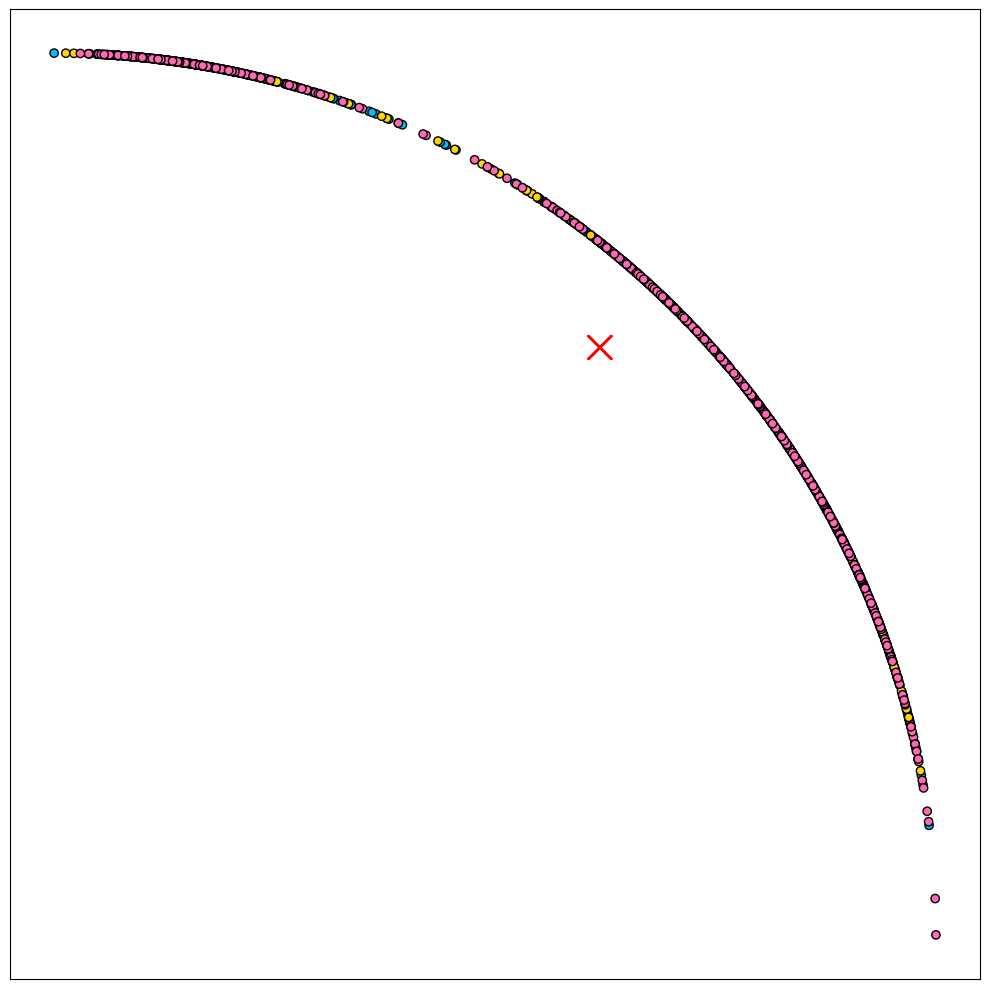

In [10]:
visualization.makeExcel()
#visualization.plot_tsne(mlp=True)
visualization.plot(mlp=True)